# Google maps - Eixos  
El primer paso para conseguir los poligonos de las areas de interes de la Ciudad de Barcelona se realiza usando Google Maps. Esta herramienta tiene la opcion de poder dibujar poligonos sobre sus mapas. Es muy facil de esta manera pues aqui mismo las zonas de interes (las de color amarillo beige) son visibles. El proceso es bastante sencillo, se selecciona un sector geografico, se define con un poligono y luego se agrega marcadores de posicion.

<img src="gm_aoi_0.png">

El resultado final lo podemos ver de la siguiente manera:

<img src="gm_aoi.png">

Aproximadamente se han podido dibujar alrededor de 90 areas de interes

Al tener ya listas los poligonos, el siguiente paso es exportar el resultado. Aqui la unica opción es exportarlo a un fichero con el formato KMZ.  
Este tipo de fichero tiene la peculiaridad que esta comprimido para que pueda ser utilizado como un fichero KML. 
El siguiente Script se resume en convertir el fichero KMZ a un formato geojson para que sea mas homogeneo, aunque en el camino tambien se evaluara si es posible convertirlo a un ficher CSV.

In [4]:
import numpy as np
import pandas as pd

In [352]:
from zipfile import ZipFile

In [353]:
filename = 'aoi_BCN.kmz'

In [354]:
kmz = ZipFile(filename, 'r')
kml = kmz.open('doc.kml', 'r')

In [355]:
import xml.sax, xml.sax.handler
class PlacemarkHandler(xml.sax.handler.ContentHandler):
    def __init__(self):
        self.inName = False # handle XML parser events
        self.inPlacemark = False
        self.mapping = {}
        self.buffer = ""
        self.name_tag = ""
       
    def startElement(self, name, attributes):
        if name == "Placemark": # on start Placemark tag
            self.inPlacemark = True
            self.buffer = ""
        if self.inPlacemark:
            if name == "name": # on start title tag
                self.inName = True # save name text to follow
           
    def characters(self, data):
        if self.inPlacemark: # on text within tag
            self.buffer += data # save text if in title
           
    def endElement(self, name):
        self.buffer = self.buffer.strip('\n\t')
       
        if name == "Placemark":
            self.inPlacemark = False
            self.name_tag = "" #clear current name
       
        elif name == "name" and self.inPlacemark:
            self.inName = False # on end title tag           
            self.name_tag = self.buffer.strip()
            self.mapping[self.name_tag] = {}
        elif self.inPlacemark:
            if name in self.mapping[self.name_tag]:
                self.mapping[self.name_tag][name] += self.buffer
            else:
                self.mapping[self.name_tag][name] = self.buffer
        self.buffer = ""

In [356]:
parser = xml.sax.make_parser()
handler = PlacemarkHandler()
parser.setContentHandler(handler)
parser.parse(kml)
kmz.close()

In [357]:
 def build_table(mapping):
    sep = ','
       
    output = 'Name' + sep + 'Coordinates\n'
    points = ''
    lines = ''
    shapes = ''
    for key in mapping:
        coord_str = mapping[key]['coordinates'] + sep
       
        if 'LookAt' in mapping[key]: #points
            points += key + sep + coord_str + "\n"
        elif 'LineString' in mapping[key]: #lines
            lines += key + sep + coord_str + "\n"
        else: #shapes
            shapes += key + sep + coord_str + "\n"
    output += points + lines + shapes
    return output

In [358]:
outstr = build_table(handler.mapping)
out_filename = filename[:-3] + "csv" #output filename same as input plus .csv
f = open(out_filename, "w")
f.write(outstr)
f.close()
print(outstr)

Name,Coordinates
aoi_1,              
                2.1304911,41.3822118,0
                2.1310061,41.3814712,0
                2.1326798,41.3820186,0
                2.1319931,41.38321,0
                2.1329802,41.3838539,0
                2.1333235,41.3844013,0
                2.1328943,41.3848843,0
                2.134053,41.3856893,0
                2.1348684,41.3847233,0
                2.1361988,41.3854639,0
                2.1354263,41.3860435,0
                2.1358126,41.3870094,0
                2.1368425,41.3877821,0
                2.1362846,41.3884261,0
                2.1378296,41.3894564,0
                2.1366709,41.3904545,0
                2.128002,41.3882007,0
                2.1275299,41.3854961,0
                2.1287745,41.3858503,0
                2.1294611,41.3857215,0
                2.1299332,41.3845301,0
                2.1290319,41.3840149,0
                2.1293753,41.3830168,0
                2.1299332,41.3827914,0
                2.1304911,41.3

In [359]:
sep = ','
zinput = str("aoi_1,")
f = open("aoi_BCN.txt", 'r')
for linea in f.readlines():
    if linea[-1] == '\n':
        linea = linea.strip()
    if linea == sep:
        linea = linea[:-1]
    if linea == zinput:
        linea = linea.split()
        x = x.replace("[", "").replace("]", "")
    print(linea)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'aoi_BCN.txt'

In [ ]:
import sys

with open("aoi_BCN.txt") as infile:
    for line in infile:
        line = sys.stdout.write(line.strip().replace(',0','\n').replace('ao','\nao'))

In [ ]:
        lista_a = line.split(',')
        frecuencia = []
        for w in lista_a:
            frecuencia.append(lista_a.count(w))
        print(len(frecuencia))

In [457]:
f.close()

In [450]:
d.write("Name,lat,lon\n")
with open("aoi_BCN.txt", 'r') as file:
    for n in file:
        for line in file:
            if zinput in line:
                d.write(line)
                break

In [448]:
def salto(nums, elems = 3):
    final = ''
    steps = 0
    for num in nums:
        steps += 1
        final += '%s, ' % num
        if steps == elems:
            final += '\n'
            steps = 0
    return final

In [449]:
g = open("final.txt", 'w')
g.write("Name,Coordinates,0\n")
with open("aoi_BCN_d.txt", 'r') as file:
    for n in file:
        for line in file:
            x = line.split()
            gg= salto(x)
            g.write(str(gg))
            print(gg)
            break

In [423]:
temp = pd.read_csv('/Users/alter/Documents/Barcelona/La Salle/Asignaturas/TFM_2/TFM_2/aoi_BCN.csv') 

In [424]:
temp

,Name,Coordinates,0
0,aoi_1,,NaN
1,2.1304911,41.3822118,0.0
2,2.1310061,41.3814712,0.0
3,2.1326798,41.3820186,0.0
4,2.1319931,41.38321,0.0
...,...,...,...
3398,2.0727213,41.3567775,0.0
3399,2.0724423,41.3569225,0.0
3400,2.0717986,41.3565842,0.0
3401,2.0705969,41.356552,0.0


Se desearia construir un Script capaz de poder parsear directamente el formato KMZ a un fichero CSV con las columnas: Poligono, Latitud y longitud. Sin embargo aun no se ha desarrollado y en su lugar para ahorrar un poco de tiempo en este proceso se ha utilizado excel para corregir el formato:

<img src="excel_MAL.png">
<img src="excel_BIE.png">

In [4]:
polys = pd.read_csv('aoi_BCN_CORR.csv')
polys.head()

,Name,lon,lat
0,aoi_1,2.130491,41.382212
1,aoi_1,2.131006,41.381471
2,aoi_1,2.132680,41.382019
3,aoi_1,2.131993,41.383210
4,aoi_1,2.132980,41.383854


In [47]:
len(polys['Name'].unique())

114

In [320]:
data_filter = polys[polys.Name.isin(['aoi_3'])]#, 'aoi_4']) ]
(data_filter)
#1 ->25
#2 ->29
#3 ->5

,Name,lon,lat
54,aoi_3,2.145919,41.393738
55,aoi_3,2.146134,41.393433
56,aoi_3,2.146692,41.393787
57,aoi_3,2.146498,41.394141
58,aoi_3,2.145919,41.393738


In [321]:
data_filter['cor'] = '('+data_filter['lon'].astype(str)+', '+data_filter['lat'].astype(str)+')'

C:\Users\alter\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [322]:
data_filter

,Name,lon,lat,cor
54,aoi_3,2.145919,41.393738,"(2.1459191000000004, 41.3937384)"
55,aoi_3,2.146134,41.393433,"(2.1461337000000005, 41.3934325)"
56,aoi_3,2.146692,41.393787,"(2.1466916, 41.3937867)"
57,aoi_3,2.146498,41.394141,"(2.1464985, 41.3941408)"
58,aoi_3,2.145919,41.393738,"(2.1459191000000004, 41.3937384)"


In [323]:
txy = data_filter['Name'].unique()

In [324]:
txy

array(['aoi_3'], dtype=object)

In [325]:
for elem in txy:
    n = 1
    if elem == ('aoi_'+str(3)):
        print("{}".format(data_filter['cor']))

54    (2.1459191000000004, 41.3937384)
55    (2.1461337000000005, 41.3934325)
56             (2.1466916, 41.3937867)
57             (2.1464985, 41.3941408)
58    (2.1459191000000004, 41.3937384)
Name: cor, dtype: object


In [173]:
dt_new = data_filter[['Name','cor']]
dt_new.reset_index(drop=True, inplace=True)
dt_new

,Name,cor
0,aoi_3,"(2.1459191000000004,41.3937384)"
1,aoi_3,"(2.1461337000000005,41.3934325)"
2,aoi_3,"(2.1466916,41.3937867)"
3,aoi_3,"(2.1464985,41.3941408)"
4,aoi_3,"(2.1459191000000004,41.3937384)"


In [107]:
coor['Name'] = data_filter['Name']
coor = '('+(data_filter['lon']).astype(str)+ ','+(data_filter['lat']).astype(str)+')'

In [146]:
dt_neww = data_filter[['lat','lon']]

In [175]:
dt_neww

,lat,lon
54,41.393738,2.145919
55,41.393433,2.146134
56,41.393787,2.146692
57,41.394141,2.146498
58,41.393738,2.145919


In [174]:
dt_neww.to_csv('dt_neww.csv', header=False, index=False)

In [ ]:
import csv, json
from geojson import Feature, FeatureCollection, Point

features = []
with open('CurrentObs.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for latitude, longitude, weather, temp in reader:
        latitude, longitude = map(float, (latitude, longitude))
        features.append(
            Feature(
                geometry = Point((longitude, latitude)),
                properties = {
                    'weather': weather,
                    'temp': temp
                }
            )
        )

collection = FeatureCollection(features)
with open("GeoObs.json", "w") as f:
    f.write('%s' % collection)

In [257]:
import csv, json
from geojson import MultiPolygon

MultiPolygon([
     ([(3.78, 9.28), (-130.91, 1.52), (35.12, 72.234), (3.78, 9.28)],),
     ([(23.18, -34.29), (-1.31, -4.61), (3.41, 77.91), (23.18, -34.29)],)
 ]) 

{"coordinates": [[[[3.78, 9.28], [-130.91, 1.52], [35.12, 72.234], [3.78, 9.28]]], [[[23.18, -34.29], [-1.31, -4.61], [3.41, 77.91], [23.18, -34.29]]]], "type": "MultiPolygon"}

In [258]:
import csv, json
from geojson import MultiPolygon

MultiPolygon([
    ([(41.3937384,2.1459191), (41.3934325,2.1461337), (41.3937867,2.1466916), (41.3941408,2.1464985), (41.3937384,2.1459191)],)
 ]) 

{"coordinates": [[[[41.393738, 2.145919], [41.393433, 2.146134], [41.393787, 2.146692], [41.394141, 2.146498], [41.393738, 2.145919]]]], "type": "MultiPolygon"}

In [ ]:
import csv, json
from geojson import MultiPolygon

features = []
with open('t_prueb.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    for cor in reader:

        features.append(
            MultiPolygon(
                geometry = MultiPolygon(cor)
            )
        )

collection = MultiPolygon(features)
with open("GeoObs.json", "w") as f:
    f.write('%s' % collection)

In [256]:
import csv
import json
from collections import OrderedDict

li = []
with open('t_prueb.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for cor in reader:
        d = OrderedDict()
        d['geometry'] = {
            'coordinates': [str(cor)],
            'type': 'MultiPolygon'
        }
        li.append(d)

d = OrderedDict()
d['features'] = li
with open('GeoObs.json', 'w') as f:
    f.write('%s' % d)

In [12]:
from geojson import MultiPolygon

# Fase de superposicion de la base de datos y los poligonos

In [1]:
import numpy as np
import pandas as pd

In [2]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geopandas as gpd

In [3]:
ret_ds = pd.read_csv('EIXOS - TFM La Salle - Barcelona.csv', usecols=['id', 'layer_id', 'layer_esp', 'title', 'lon', 'lat']) 
frn_ds = pd.read_csv('eixos_cadenes_franquicies.csv',sep = ',')
print('retail shape', ret_ds.shape)
print('franquicies shape',frn_ds.shape)

retail shape (80362, 6)
franquicies shape (999, 2)


In [4]:
ret_ds.head()

,id,layer_id,layer_esp,title,lon,lat
0,83969,12,taller mecánico,Garces Taller,2.153513,41.379259
1,86258,146,"productos eróticos, sex shops, condoneria",Ritsch,2.162346,41.384287
2,83964,40,bares de copas,Lunch & Catering Bar,2.153682,41.379125
3,83970,8,tienda de ropa,Galaxia Complements Dona,2.153428,41.379321
4,74866,40,bares de copas,Celler de l`Abi,2.142066,41.369410


In [5]:
col = ret_ds.columns.tolist()
for column in col:
  print("{}: {}".format(column, ret_ds[column].isnull().sum()))

id: 0
layer_id: 0
layer_esp: 0
title: 1
lon: 29
lat: 29


In [6]:
ret_ds.dropna(inplace=True)
ret_ds.shape

(80332, 6)

In [7]:
geometry = [Point(xy) for xy in zip (ret_ds['lon'], ret_ds['lat'])]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(ret_ds, crs=crs, geometry=geometry)

/Users/deboraitzep/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
gdf.head()

,id,layer_id,layer_esp,title,lon,lat,geometry
0,83969,12,taller mecánico,Garces Taller,2.153513,41.379259,POINT (2.15351 41.37926)
1,86258,146,"productos eróticos, sex shops, condoneria",Ritsch,2.162346,41.384287,POINT (2.16235 41.38429)
2,83964,40,bares de copas,Lunch & Catering Bar,2.153682,41.379125,POINT (2.15368 41.37913)
3,83970,8,tienda de ropa,Galaxia Complements Dona,2.153428,41.379321,POINT (2.15343 41.37932)
4,74866,40,bares de copas,Celler de l`Abi,2.142066,41.369410,POINT (2.14207 41.36941)


In [9]:
ret_ds['lon'].dtype

dtype('float64')

In [10]:
frn_ds.head()

,CADENA,VALUE
0,Accezorize,1.0
1,Adidas,1.0
2,Adolfo Dominguez,1.0
3,Agua Viva,1.0
4,Ale -Hop,1.0


In [11]:
frn_ds['VALUE'].unique()

array([ 1., nan])

In [12]:
ret_ds.columns

Index(['id', 'layer_id', 'layer_esp', 'title', 'lon', 'lat', 'geometry'], dtype='object')

In [13]:
ret_ds.dtypes

id              int64
layer_id        int64
layer_esp      object
title          object
lon           float64
lat           float64
geometry     geometry
dtype: object

In [14]:
import geopandas
import geoplot

In [15]:
polys = gpd.read_file('aoi_BCN.geojson')
polys.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,geometry
0,aoi_1,None,None,None,None,None,-1,0,-1,None,None,"POLYGON Z ((2.13049 41.38221 0.00000, 2.13101 ..."
1,aoi_2,None,None,None,None,None,-1,0,-1,None,None,"POLYGON Z ((2.14463 41.39321 0.00000, 2.14495 ..."
2,aoi_3,None,None,None,None,None,-1,0,-1,None,None,"POLYGON Z ((2.14592 41.39374 0.00000, 2.14613 ..."
3,aoi_4,None,None,None,None,None,-1,0,-1,None,None,"POLYGON Z ((2.14860 41.39433 0.00000, 2.14884 ..."
4,aoi_5,None,None,None,None,None,-1,0,-1,None,None,"POLYGON Z ((2.14845 41.39443 0.00000, 2.14873 ..."


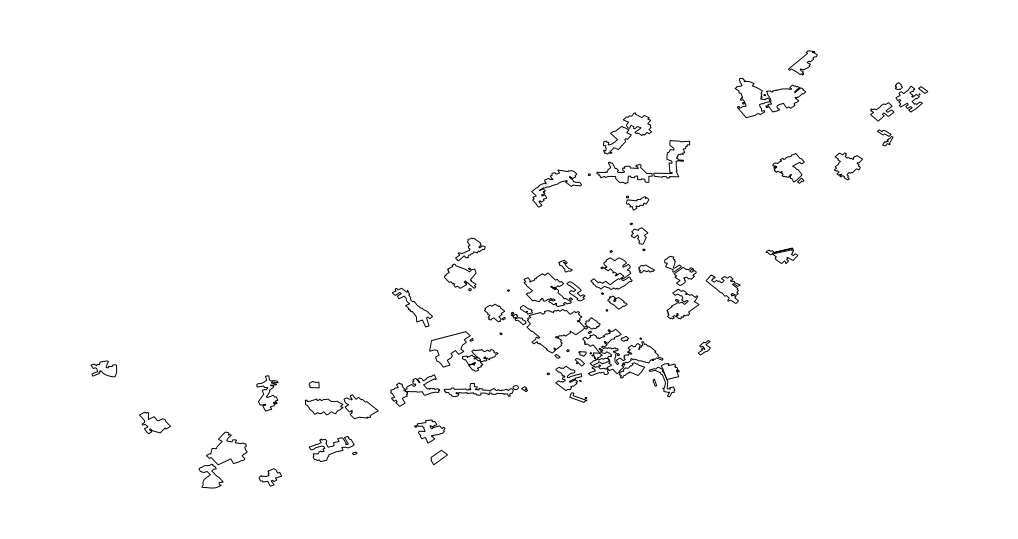

In [16]:
geoplot.polyplot(polys, figsize=(18, 10))

In [17]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [18]:
col = ret_ds.columns.tolist()
for column in col:
  print("{}: {}".format(column, ret_ds[column].isnull().sum()))

id: 0
layer_id: 0
layer_esp: 0
title: 0
lon: 0
lat: 0
geometry: 0


In [19]:
gdf.shape

(80332, 7)

In [20]:
gdf = gdf.loc[gdf['lon'] != 0]
gdf = gdf.loc[gdf['lat'] != 0]
gdf.shape

(80332, 7)

In [21]:
gdf_test = gdf.loc[gdf['lat'] > 41.37982]
gdf_test = gdf_test.loc[gdf_test['lat'] < 41.39002]

gdf_test = gdf_test.loc[gdf_test['lon'] > 2.12699]
gdf_test = gdf_test.loc[gdf_test['lon'] < 2.14535]
gdf_test.shape

(3379, 7)

In [22]:
poly_t = polys.geometry[[0, 42, 44, 45]]#[0, 42, 44, 45]
poly_t.reset_index(drop=True, inplace=True)
poly_t

0    POLYGON Z ((2.13049 41.38221 0.00000, 2.13101 ...
1    POLYGON Z ((2.13840 41.38874 0.00000, 2.13770 ...
2    POLYGON Z ((2.14073 41.38594 0.00000, 2.14043 ...
3    POLYGON Z ((2.13579 41.38410 0.00000, 2.13592 ...
Name: geometry, dtype: geometry

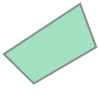

In [23]:
poly_t[1]

In [24]:
for i in poly_t:
    dentro = gdf_test[gdf_test.apply(lambda row: poly_t[3].contains(Point(row.lon, row.lat)), axis=1)]
    dentro.head()

In [25]:
dentro.head()

,id,layer_id,layer_esp,title,lon,lat,geometry
7427,369538,151,"comida rápida, comida preparada, comida para l...",Frankfurt,2.139876,41.382229,POINT (2.13988 41.38223)
7428,369539,28,tienda de animales,Mascotas Barcelona,2.139333,41.382649,POINT (2.13933 41.38265)
7429,369540,31,supermercado,Hong Ping Guo,2.139187,41.382774,POINT (2.13919 41.38277)
7430,369541,42,locales comerciales,Local Buit,2.139187,41.382774,POINT (2.13919 41.38277)
7434,369545,8,tienda de ropa,Bungad,2.140942,41.382120,POINT (2.14094 41.38212)


In [26]:
dentro.shape

(168, 7)

In [66]:
import shapefile

for i, pt in enumerate(gdf_test):
    point = shape(pt)
    if point.within(multi): 
        print(i, shape(points[i]))

AttributeError: 'GeoDataFrame' object has no attribute 'shapeRecords'

In [27]:
import geopandas as gpd
from shapely.geometry import Polygon

map_data = gpd.read_file('aoi_BCN.geojson')

In [29]:
# Latitud          Longitud
#  41.3887901       2.1589899
import folium

m = folium.Map([41.3887901,2.1589899], zoom_start=13, tiles='cartodbpositron')
folium.GeoJson(map_data).add_to(m)
folium.LatLngPopup().add_to(m)
def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.lat, point.lon],
                        radius=2,
                        weight=1).add_to(m)
dentro.apply(plotDot, axis = 1)
#gdf_test.apply(plotDot, axis = 1)
#ret_ds.apply(plotDot, axis = 1)
m

In [118]:
print type(f.geometry[2])
f.geometry[2]

SyntaxError: invalid syntax (<ipython-input-118-615bcf173ebd>, line 1)

In [67]:
states.plot()

In [153]:
import geojson
from descartes import PolygonPatch
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

with open('aoi_BCN.geojson') as f:
    f = geojson.load(f)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [86]:
for i in range(2799):
    coordlist = f.features[i]['geometry']['coordinates'][0]
    if i < 5:
        name = f.features[i]['properties']['CTRYNAME']
        aez =  f.features[i]['properties']['AEZ']
 
    for j in range(len(coordlist)):
        for k in range(len(coordlist[j])):
            coordlist[j][k][0],coordlist[j][k][1]=m(coordlist[j][k][0],coordlist[j][k][1])
 
    poly = {"type":"Polygon","coordinates":coordlist}#coordlist
    ax.add_patch(PolygonPatch(poly, fc=[0,0.5,0], ec=[0,0.3,0], zorder=0.2 ))

ax.axis('scaled')
plt.draw()
plt.show()

AttributeError: '_io.TextIOWrapper' object has no attribute 'features'